In [1]:
from datetime import datetime
from pathlib import Path

import geopandas as gpd
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
input_data = Path("data/")

In [5]:
# data = pd.read_csv("data/Waste_Collection___Diversion_Report__daily_.csv")
data = pd.read_csv(input_data / "Waste_Collection___Diversion_Report__daily_.csv")
data['Report Date'] = data['Report Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
data['Load Time'] = data['Load Time'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))
data['Load Weight'] = data['Load Weight'].apply(lambda x: float(str(x).replace(',', '')))

In [6]:
data.head()

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,Route Number,Load ID
0,2020-12-08,BULK,2020-12-08 15:02:00,5220.0,TDS LANDFILL,BULK,BU13,899097
1,2020-12-08,RECYCLING - SINGLE STREAM,2020-12-08 10:00:00,11140.0,TDS - MRF,RECYCLING - SINGLE STREAM,RTAU53,899078
2,2020-12-03,RECYCLING - SINGLE STREAM,2020-12-03 10:34:00,10060.0,BALCONES RECYCLING,RECYCLING - SINGLE STREAM,RHBU10,899082
3,2020-12-07,SWEEPING,2020-12-07 10:15:00,7100.0,TDS LANDFILL,SWEEPER DUMPSITES,DSS04,899030
4,2020-12-07,RECYCLING - SINGLE STREAM,2020-12-07 16:00:00,12000.0,TDS - MRF,RECYCLING - SINGLE STREAM,RMAU53,899048


Summary:

- 1 negative value
- 72335 non values

# Load Weight

In [7]:
# Filtering data
data_filtered = data[data['Load Weight'] >= 0]
data_filtered = data_filtered[data_filtered['Load Weight'] <= 1562821]
print(len(data), len(data_filtered))

740873 668537


In [9]:
def get_route_data(df, route, date_from = None, date_to = None):
    if date_from is not None and date_to is not None:
        df = df[(df['Report Date'] >= date_from) & (df['Report Date'] <= date_to)]
        return df[df['Route Type'] == route]
    else:
        return df[df['Route Type'] == route]

def get_route_number_data(df, route, date_from = None, date_to = None):
    data = df[(df['Route Number'] == route) & (df['Report Date'] >= date_from) & (df['Report Date'] <= date_to)]
    return data

In [10]:
# get_route_data(data_filtered, 'GARBAGE COLLECTION', '2020-12-04', '2020-12-04').sort_values(by='Load Time')
# get_route_number_data(data_filtered, 'PF14', '2020-12-04', '2020-12-24')
get_route_number_data(data_filtered, 'PAM71', '2020-12-04', '2020-12-24')

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,Route Number,Load ID
911,2020-12-14,GARBAGE COLLECTIONS,2020-12-15 08:30:00,17080.0,TDS LANDFILL,GARBAGE COLLECTION,PAM71,899905
1619,2020-12-21,GARBAGE COLLECTIONS,2020-12-21 13:45:00,20680.0,TDS LANDFILL,GARBAGE COLLECTION,PAM71,900770
1665,2020-12-21,GARBAGE COLLECTIONS,2020-12-21 16:00:00,7840.0,TDS LANDFILL,GARBAGE COLLECTION,PAM71,900771
171472,2020-12-07,GARBAGE COLLECTIONS,2020-12-07 13:15:00,21140.0,TDS LANDFILL,GARBAGE COLLECTION,PAM71,898887
200968,2020-12-07,GARBAGE COLLECTIONS,2020-12-07 17:00:00,11400.0,TDS LANDFILL,GARBAGE COLLECTION,PAM71,898888


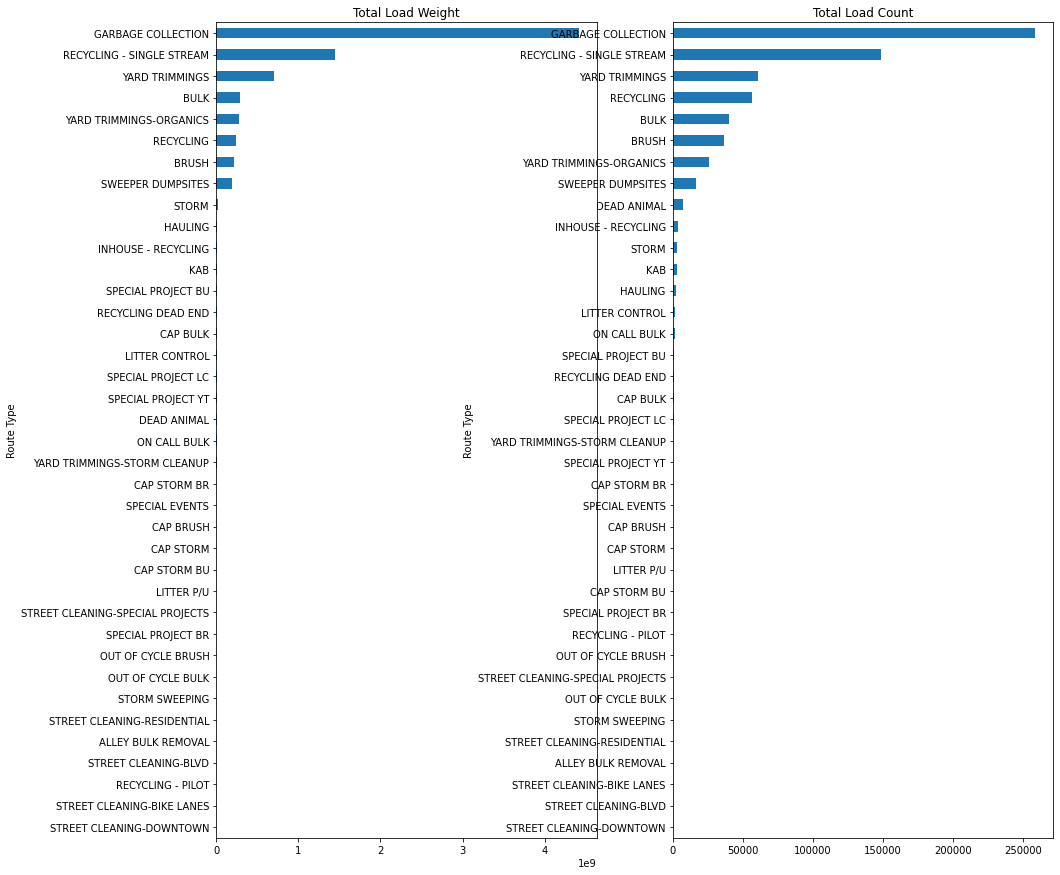

In [11]:
fig, axs = plt.subplots(1,2, figsize=(15,15))
data_filtered.groupby(['Route Type'])['Load Weight'].sum().sort_values(ascending=True).plot(kind='barh', ax=axs[0], title='Total Load Weight');
data_filtered.groupby(['Route Type'])['Load Weight'].count().sort_values(ascending=True).plot(kind='barh', ax=axs[1], title='Total Load Count');


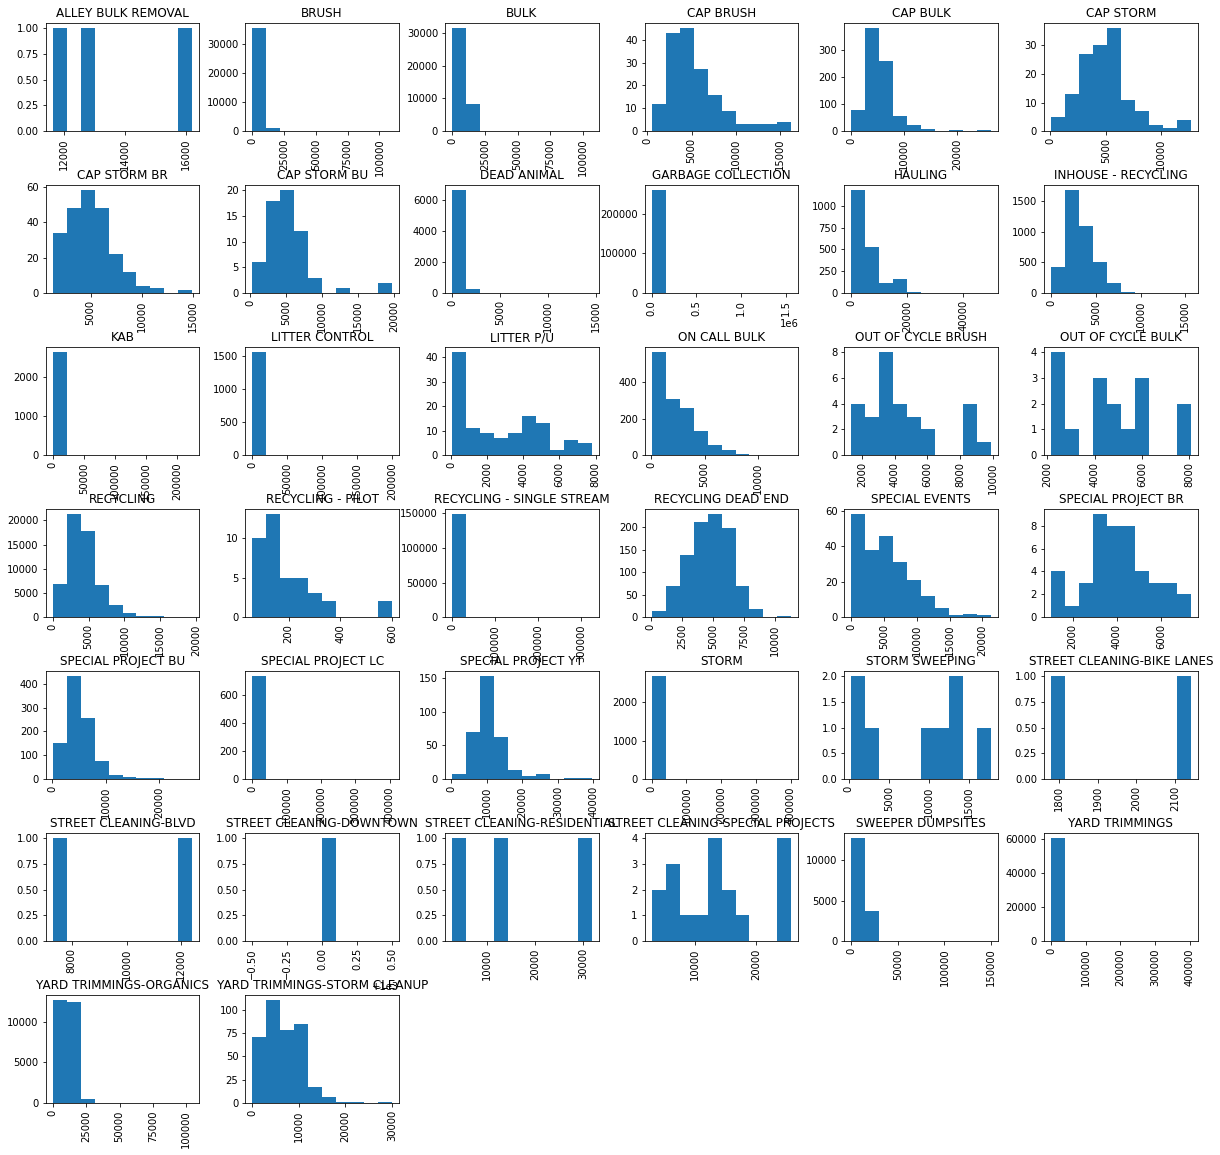

In [12]:
data_filtered['Load Weight'].hist(by=data_filtered['Route Type'], figsize=(20,20));

In [13]:
data[data['Load Weight'] == 1562821]

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,Route Number,Load ID
292153,2015-11-10,GARBAGE COLLECTIONS,2015-11-10 13:50:00,1562821.0,TDS LANDFILL,GARBAGE COLLECTION,PAT82,674334


In [37]:
profile = ProfileReport(data, title="Waste Collection Report")
profile.to_file("waste_collection.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 106.57it/s]


# Garbage Routes

In [6]:
# Garbage routes
routes = gpd.read_file(open("data/Garbage Routes.geojson"))

In [13]:
routes.head()

,rt_old,garb_day,landfill,garb_rt,super_num,op_type,garb_sup,geometry
0,None,Thursday,TDS,PAH83,697,Auto,Gilbert,"MULTIPOLYGON (((-97.70618 30.36742, -97.70723 ..."
1,PAM84,Monday,TDS,PAM54,500,Auto,Castillo,"MULTIPOLYGON (((-97.83237 30.16213, -97.83237 ..."
2,None,Monday,TDS,PAM71,596,Auto,Carnline,"MULTIPOLYGON (((-97.72977 30.19009, -97.72103 ..."
3,PAH75,Thursday,TDS,PAH54,500,Auto,Castillo,"MULTIPOLYGON (((-97.65374 30.26269, -97.65322 ..."
4,None,Wednesday,TDS,PAW71,596,Auto,Carnline,"MULTIPOLYGON (((-97.64683 30.38640, -97.64724 ..."


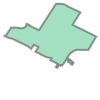

In [33]:
# routes.loc[2]['geometry']
routes.loc[5]['geometry']

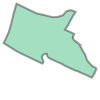

In [42]:
# routes.head()
routes[routes["garb_rt"] == "PAH83"]['geometry'][0]
# routes.crs

rt_old                                                    None
garb_day                                                Monday
landfill                                                   TDS
garb_rt                                                  PAM71
super_num                                                  596
op_type                                                   Auto
garb_sup                                              Carnline
geometry     (POLYGON ((-97.72977104057442 30.1900926577680...
Name: 2, dtype: object


/Users/darenasc/.local/share/virtualenvs/data_world_league_2022-o40nAfHA/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/Users/darenasc/.local/share/virtualenvs/data_world_league_2022-o40nAfHA/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/Users/darenasc/.local/share/virtualenvs/data_world_league_2022-o40nAfHA/lib/python3.8/site-packages/pandas/io/formats/printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be remo

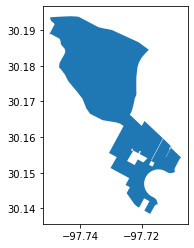

In [133]:
# routes.plot()
routes[(routes['garb_rt'] == 'PAM71') | (routes['rt_old'] == 'PAM71')].plot();
for i, r in routes.iterrows():
    # print(r.garb_rt)
    if r['garb_rt'] == 'PAM71':
        print(r)

In [4]:
# Clean data exploratino
clean_df = pd.read_csv(input_data / "clean_waste_data.csv")
clean_df.head()

/var/folders/vd/55ch_jl13ld6fp51dm5xc2t00000gn/T/ipykernel_3189/3627037626.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  clean_df = pd.read_csv(input_data / "clean_waste_data.csv")


,date,year,month,wday,Load.Type,Route.Type,Dropoff.Site,Route.Number,outlier,total_pop,annualised_growth,nb_loads,daily_weight
0,2005-01-03,2005,1,Mon,BRUSH,BRUSH,HORNSBY BEND,BR05,normal,700407.0,1.20%,2,8000.0
1,2005-01-03,2005,1,Mon,BRUSH,BRUSH,HORNSBY BEND,BR05,outlier,700407.0,1.20%,1,9400.0
2,2005-01-03,2005,1,Mon,BRUSH,BRUSH,HORNSBY BEND,BRPN01,outlier,700407.0,1.20%,1,3140.0
3,2005-01-03,2005,1,Mon,BRUSH,BRUSH,HORNSBY BEND,BRPS01,normal,700407.0,1.20%,1,5640.0
4,2005-01-03,2005,1,Mon,BULK,BULK,STEINER LANDFILL,BU27,normal,700407.0,1.20%,1,4620.0


In [6]:
profile = ProfileReport(clean_df, title="Waste Collection (clean data) Report")
profile.to_file("waste_collection_clean_data.html")

Summarize dataset:  67%|██████▋   | 16/24 [00:05<00:01,  5.16it/s, Calculate kendall correlation]      /Users/darenasc/.local/share/virtualenvs/data_world_league_2022-o40nAfHA/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4868: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 72.36it/s]


In [8]:
clean_df.sort_values(by='nb_loads', ascending=False).head(15)

,date,year,month,wday,Load.Type,Route.Type,Dropoff.Site,Route.Number,outlier,total_pop,annualised_growth,nb_loads,daily_weight
72453,2009-02-14,2009,2,Sat,YARD TRIMMING,HAULING,HORNSBY BEND,BRAKER SITE,normal,774037.0,3.10%,66,330000.0
179730,2013-11-04,2013,11,Mon,BULK,STORM,TDS LANDFILL,STO13,normal,855215.0,2.80%,60,534780.0
72023,2009-02-07,2009,2,Sat,YARD TRIMMING,HAULING,HORNSBY BEND,BRAKER SITE,normal,774037.0,3.10%,58,290000.0
179818,2013-11-05,2013,11,Tue,BULK,STORM,TDS LANDFILL,STO13,normal,855215.0,2.80%,55,474440.0
44566,2007-08-25,2007,8,Sat,BRUSH,SPECIAL PROJECT LC,HORNSBY BEND,SPEC PROJCT,outlier,735088.0,2.30%,49,612500.0
350906,2020-12-12,2020,12,Sat,BULK,BULK,TDS LANDFILL,BU13,normal,NaN,NaN,48,406480.0
179904,2013-11-06,2013,11,Wed,BULK,STORM,TDS LANDFILL,STO13,normal,855215.0,2.80%,46,414060.0
216933,2015-06-19,2015,6,Fri,BRUSH,BRUSH,HORNSBY BEND,HD-BR,normal,900701.0,2.50%,46,254720.0
57260,2008-05-17,2008,5,Sat,BRUSH,STORM,STEINER LANDFILL,ST0508,normal,750525.0,2.10%,45,234220.0
58343,2008-06-07,2008,6,Sat,BRUSH,STORM,HORNSBY BEND,ST0508,normal,750525.0,2.10%,42,252930.0
